<a href="https://colab.research.google.com/github/psyuktha/Tensorflow_Classification/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels)  = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#show first training example
print(f"Training sample :\n{train_data[0]}\n")
print(f"Training label :\n{train_labels[0]}\n")


Training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [3]:
#create a small lst to index our training labels to make it human readable
class_names = ["T-shirt/top",	"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)


10

In [4]:
#normalisation means nos bw 0 and 1
train_data_norm = train_data/255
test_data_norm=test_data/255

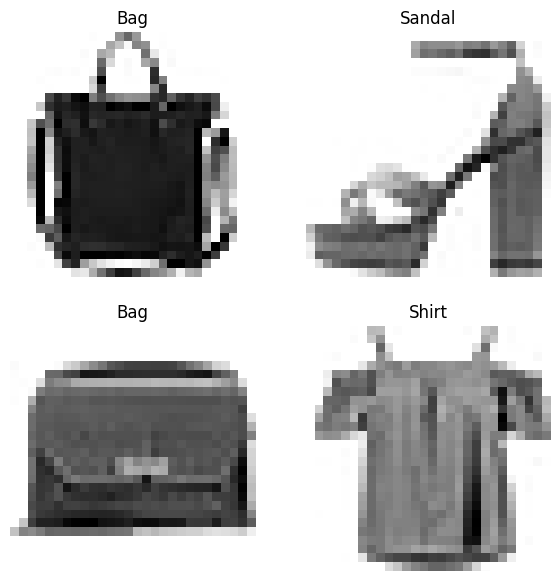

In [5]:
#plot multiple random images of fashion mnist
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [6]:
tf.random.set_seed(42)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")#10 different classes
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm,test_labels))


Epoch 1/20
1875/1875 [==============================] - 15s 7ms/step - loss: 1.0498 - accuracy: 0.6096 - val_loss: 0.7467 - val_accuracy: 0.7430
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6787 - accuracy: 0.7654 - val_loss: 0.6941 - val_accuracy: 0.7530
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6322 - accuracy: 0.7812 - val_loss: 0.6489 - val_accuracy: 0.7752
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6070 - accuracy: 0.7905 - val_loss: 0.6457 - val_accuracy: 0.7769
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5911 - accuracy: 0.7963 - val_loss: 0.6284 - val_accuracy: 0.7865
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5776 - accuracy: 0.8014 - val_loss: 0.6300 - val_accuracy: 0.7848
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5688 - accuracy: 0.8045 - val_loss: 0.6233 - val_accura

In [19]:
model_12.save("/content/drive/MyDrive/fasion_prediction")
saved_model = tf.keras.models.load_model("/content/drive/MyDrive/fasion_prediction")

In [7]:
#predictions
y_probs=saved_model_12.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.63913263e-09, 3.30948769e-16, 3.63476367e-11, 3.14779318e-05,
        3.07043307e-10, 6.02251887e-02, 7.28699163e-08, 1.07408434e-01,
        6.71944302e-03, 8.25615466e-01],
       [2.64250208e-04, 2.66549005e-08, 7.53188193e-01, 3.05973799e-06,
        8.71918499e-02, 3.49731875e-11, 1.59352422e-01, 1.79739652e-34,
        2.74342852e-07, 2.51990567e-13],
       [1.27215708e-05, 9.99372184e-01, 8.26546675e-05, 5.32022095e-04,
        3.68694401e-07, 9.31859434e-14, 4.74865978e-08, 1.68349737e-19,
        7.05993152e-14, 2.83269214e-10],
       [3.82772953e-07, 9.99789000e-01, 2.62300673e-05, 1.84339879e-04,
        1.17949881e-07, 1.45300879e-16, 1.93001903e-09, 2.66429744e-24,
        9.31141837e-16, 1.49957928e-11],
       [2.64646143e-01, 6.05537032e-04, 1.65149197e-01, 2.65995003e-02,
        4.06417586e-02, 2.84919894e-04, 5.00731945e-01, 1.93635091e-11,
        1.33652217e-03, 4.47801131e-06]], dtype=float32)

In [8]:
y_preds=y_probs.argmax(axis=1)
y_preds[10:15]


array([4, 5, 5, 3, 4])

In [9]:
test_labels[10:15]

array([4, 5, 7, 3, 4], dtype=uint8)

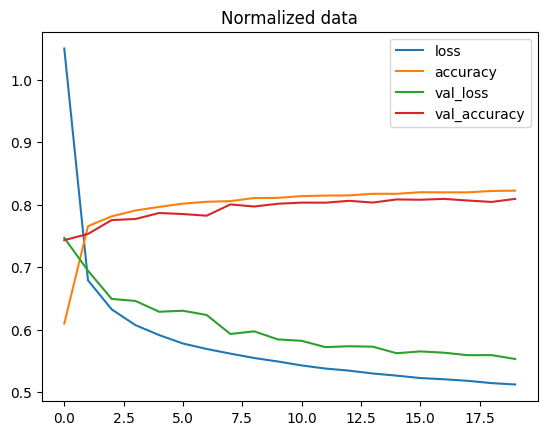

In [11]:
import pandas as pd
pd.DataFrame(norm_history.history).plot(title="Normalized data");


In [12]:
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None,  figsize=(10,10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [13]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)


array([[826,   4,  10,  76,   2,   0,  68,   0,  14,   0],
       [  4, 947,   7,  36,   1,   0,   4,   0,   1,   0],
       [ 44,   0, 620,  25, 160,   0, 147,   0,   4,   0],
       [ 51,  29,  10, 820,  35,   0,  47,   3,   5,   0],
       [  1,   1, 116,  42, 689,   0, 147,   0,   4,   0],
       [  0,   0,   0,   4,   0, 925,   0,  35,  12,  24],
       [217,   1,  75,  62, 111,   0, 518,   0,  16,   0],
       [  0,   0,   0,   0,   0,  42,   0, 910,   2,  46],
       [  5,   0,   0,  12,  13,   5,  59,   5, 900,   1],
       [  0,   0,   0,   3,   0,  11,   1,  48,   1, 936]])

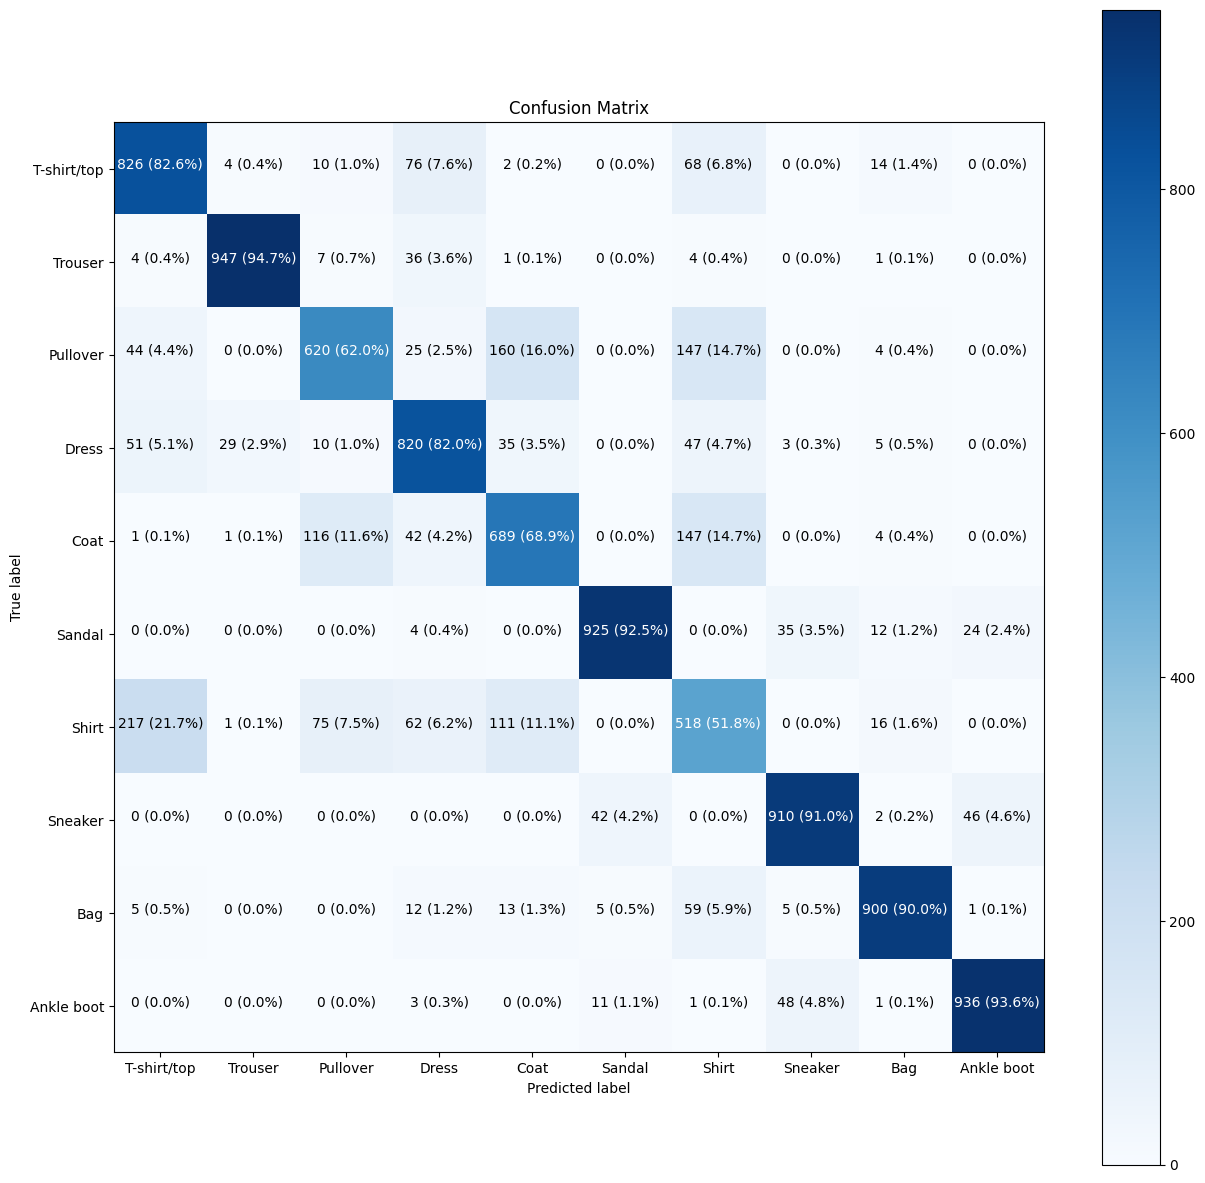

In [14]:

import numpy as np
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [15]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):


  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 110ms/step


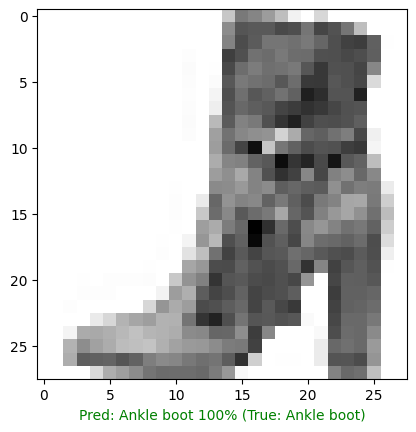

In [20]:
plot_random_image(model=saved_model,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)